In [44]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 70)

In [46]:
df_eda = pd.read_csv('df_preprocessed.csv')

In [47]:
df_eda.columns

Index(['budget', 'genres', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration', 'tagline',
       'vote_average', 'num_voted_users', 'country', 'director_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name', 'budget_categorized',
       'profit', 'profit_categorized', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'other', 'first_genre',
       'year', 'years_since_release', 'decade', 'month', 'season',
       'production_companies_list', 'language_summarized',
       'vote_average_categorized', 'plot_keywords_list'],
      dtype='object')

In [48]:
df_eda.head()

,budget,genres,plot_keywords,language,original_title,overview,popularity,production_companies,production_countries,release_date,gross,duration,tagline,vote_average,num_voted_users,country,director_name,actor_1_name,actor_2_name,actor_3_name,budget_categorized,profit,profit_categorized,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,other,first_genre,year,years_since_release,decade,month,season,production_companies_list,language_summarized,vote_average_categorized,plot_keywords_list
0,237.0,Action|Adventure|Fantasy|Science Fiction,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787.965087,162.0,Enter the World of Pandora.,7.2,11800,United States of America,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,high,2550.965087,profit,True,True,False,False,False,False,False,True,False,False,False,True,False,False,Action,2009,15,2000,12,winter,"['Ingenious Film Partners', 'Twentieth Century...",English,popular,"['culture', 'clash', 'future', 'space', 'war',..."
1,300.0,Adventure|Fantasy|Action,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961.000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,United States of America,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,high,661.000000,profit,True,True,False,False,False,False,False,True,False,False,False,False,False,False,Adventure,2007,17,2000,5,spring,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",English,popular,"['ocean', 'drug', 'abuse', 'exotic', 'island',..."
2,245.0,Action|Adventure|Crime,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880.674609,148.0,A Plan No One Escapes,6.3,4466,United Kingdom,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,high,635.674609,profit,True,True,False,False,True,False,False,False,False,False,False,False,False,False,Action,2015,9,2010,10,autumn,"['Columbia Pictures', 'Danjaq', 'B24']",Not English,average,"['spy', 'based', 'on', 'novel', 'secret', 'age..."
3,250.0,Action|Crime|Drama|Thriller,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084.939099,165.0,The Legend Ends,7.6,9106,United States of America,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,high,834.939099,profit,True,False,False,False,True,True,False,False,False,False,False,False,True,False,Action,2012,12,2010,7,summer,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",English,popular,"['dc', 'comics', 'crime', 'fighter', 'terroris..."
4,260.0,Action|Adventure|Science Fiction,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284.139100,132.0,"Lost in our world, found in another.",6.1,2124,United States of America,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,high,24.139100,no profit,True,True,False,False,False,False,False,False,False,False,False,True,False,False,Action,2012,12,2010,3,spring,['Walt Disney Pictures'],English,below_avg,"['based', 'on', 'novel', 'mars', 'medallion', ..."


In [116]:
def str_to_list(x):
    return ast.literal_eval(x)

df_eda['production_companies_list'] = df_eda['production_companies_list'].apply(str_to_list)

In [49]:
def plot_categorical_distribution(df, x_column, hue_column, title='', rotation=None):
    """
    Plots the distribution of a categorical variable based on two categorical variables.

    Parameters:
        df (DataFrame): DataFrame containing the data.
        x_column (str): The column name representing one categorical variable.
        hue_column (str): The column name representing another categorical variable for comparison.

    Returns:
        None
    """
    # Group by the two categorical variables and calculate counts
    counts = df.groupby([x_column, hue_column]).size().reset_index(name='Count')

    # Calculate total count for each category in x_column
    total_counts = counts.groupby(x_column)['Count'].transform('sum')

    # Calculate percentages
    counts['Percentage'] = np.round((counts['Count'] / total_counts) * 100, 1)

    # Plot
    plt.figure(figsize=(20, 6))
    ax = sns.barplot(data=counts, x=x_column, y='Percentage', hue=hue_column, palette='ch:s=-.2,r=.6')

    # Set x-axis label
    plt.xlabel(x_column, fontsize=15)
    plt.xticks(fontsize=12, rotation=90)

    # Set y-axis label
    plt.ylabel('Percentage', fontsize=15)
    plt.yticks(fontsize=12)

    # Show the values on each bar
    for p in ax.patches:
        if f"{p.get_height()}%" != '0%':
            ax.annotate(f"{p.get_height()}%", (p.get_x() + p.get_width() / 2., p.get_height() + .5),
                        ha='center', va='center', fontsize=15, color='black', xytext=(0, 5),
                        textcoords='offset points', rotation=rotation)

    # Show the plot
    plt.title(title)
    plt.legend(title=hue_column, title_fontsize='13')
    plt.show()

In [92]:
def plot_donut_chart(df, feature, title=''):
    """
    Plots a donut chart based on the percentage of each category in a specified feature.

    Parameters:
        df (DataFrame): DataFrame containing the data.
        feature (str): The column name representing the categorical feature.

    Returns:
        None
    """
    # Calculate percentage of each category in the feature
    category_counts = df[feature].value_counts(normalize=True) * 100

    # Generate a consistent color palette based on the number of categories
    num_categories = len(category_counts)
    colors = plt.cm.tab10(np.arange(num_categories))

    # Plot
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

    # Draw a circle at the center of the pie to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.80, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')

    # Add a title
    plt.title(title)

# Example usage
# Assuming df is your DataFrame and 'feature' is the column name you want to plot
# plot_donut_chart(df, 'feature', title='Donut Chart')


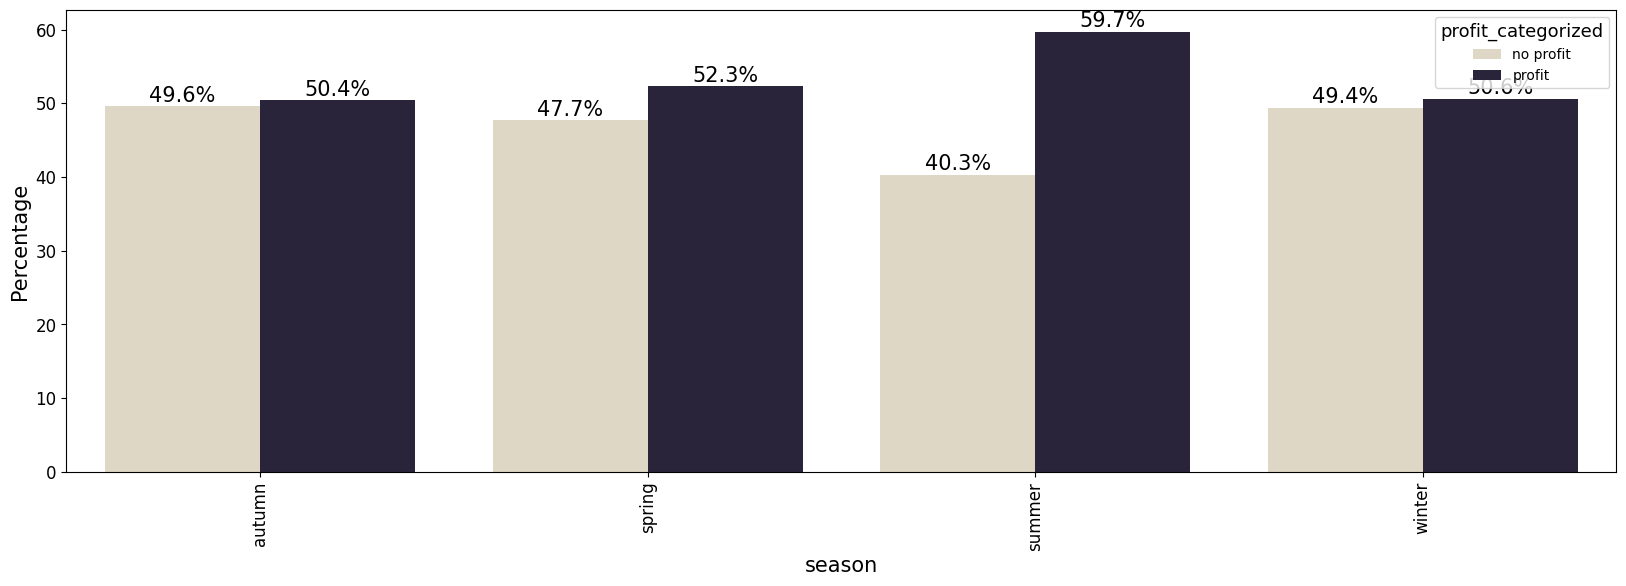

In [93]:
plot_categorical_distribution(df=df_eda, x_column='season', hue_column='profit_categorized')

## why profit before 1980 is more?

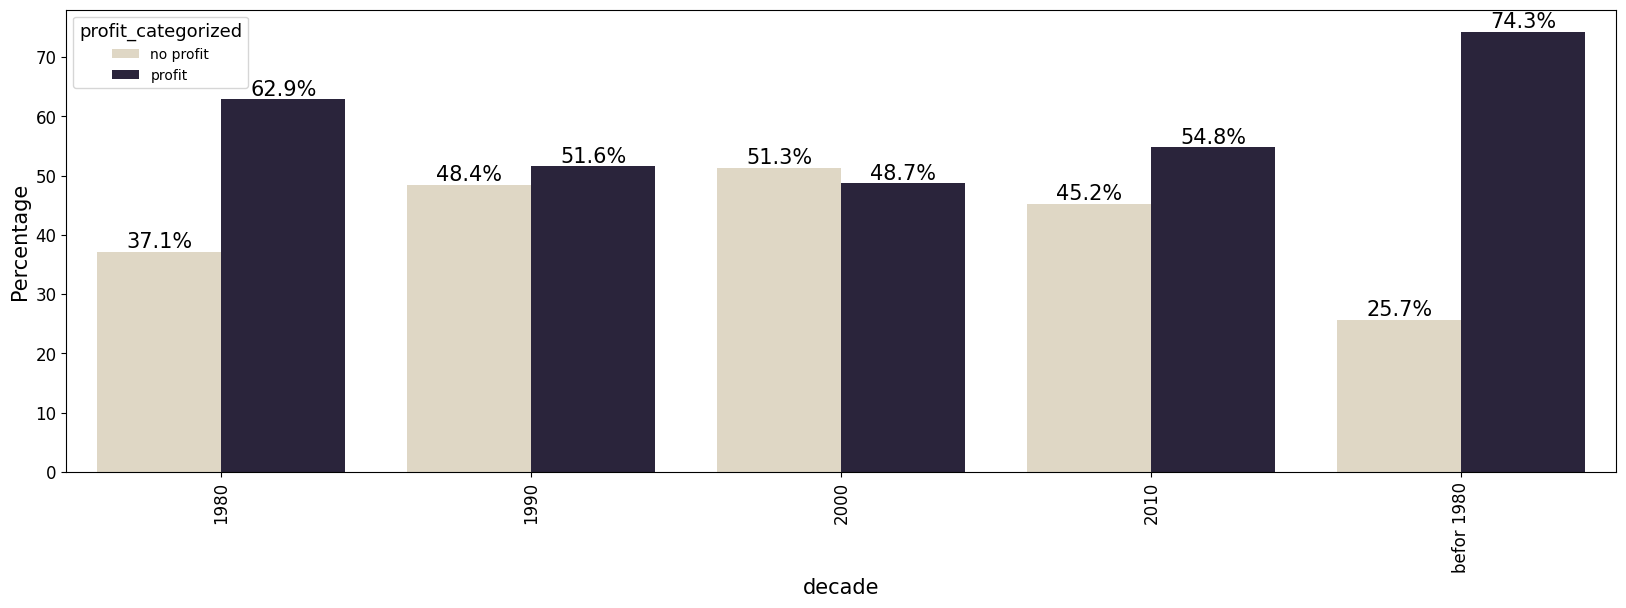

In [94]:
plot_categorical_distribution(df=df_eda, x_column='decade', hue_column='profit_categorized')

In [95]:
df_befor_80 = df_eda[df_eda['decade'] == 'befor 1980']

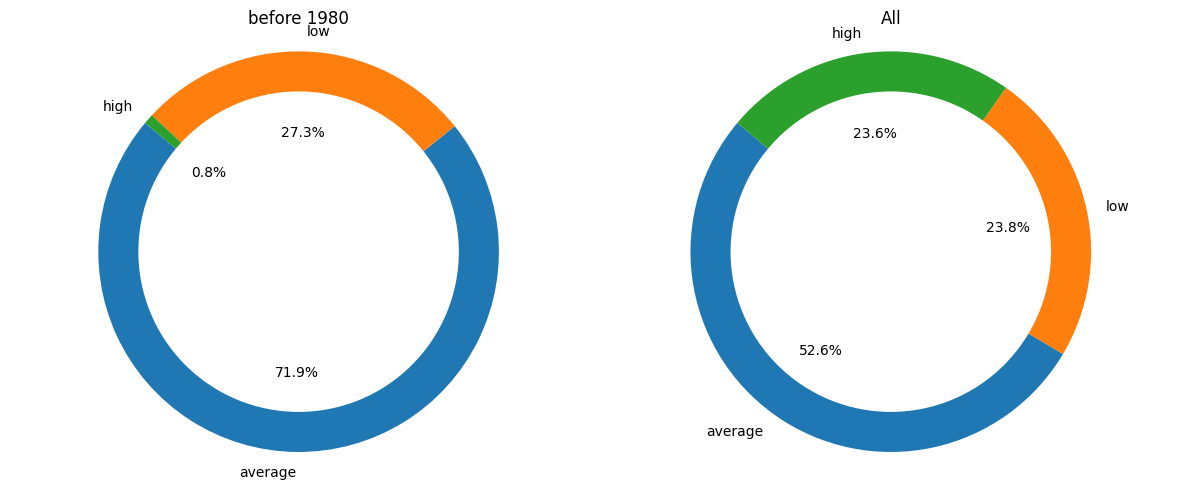

In [96]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plot_donut_chart(df=df_befor_80, feature='budget_categorized', title='before 1980')

plt.subplot(1,2,2)
plot_donut_chart(df=df_eda, feature='budget_categorized', title='All')

# Show the plot
plt.tight_layout()
plt.show()

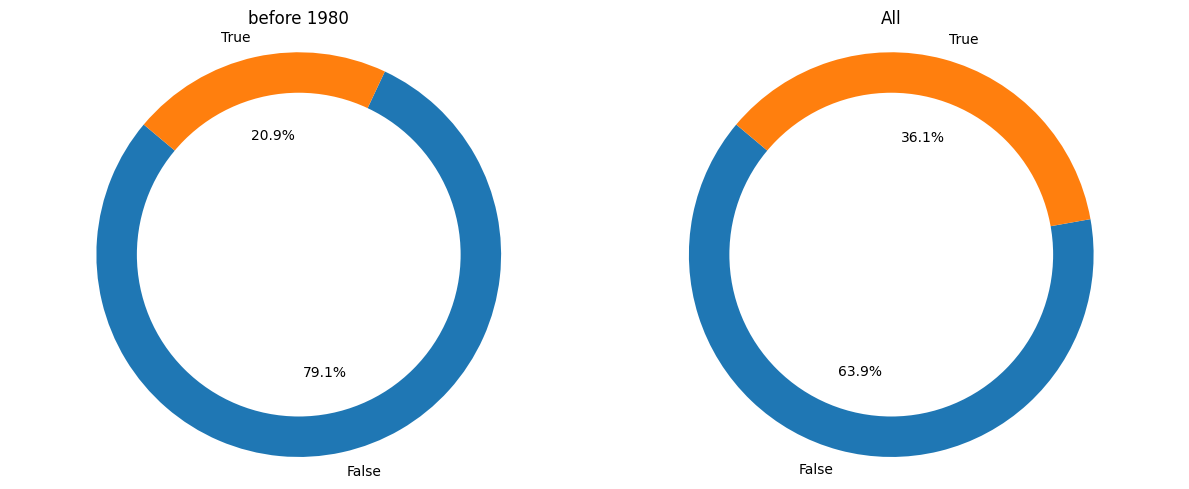

In [97]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plot_donut_chart(df=df_befor_80, feature='Comedy', title='before 1980')

plt.subplot(1,2,2)
plot_donut_chart(df=df_eda, feature='Comedy', title='All')

# Show the plot
plt.tight_layout()
plt.show()

In [98]:
colors_list[:4]

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

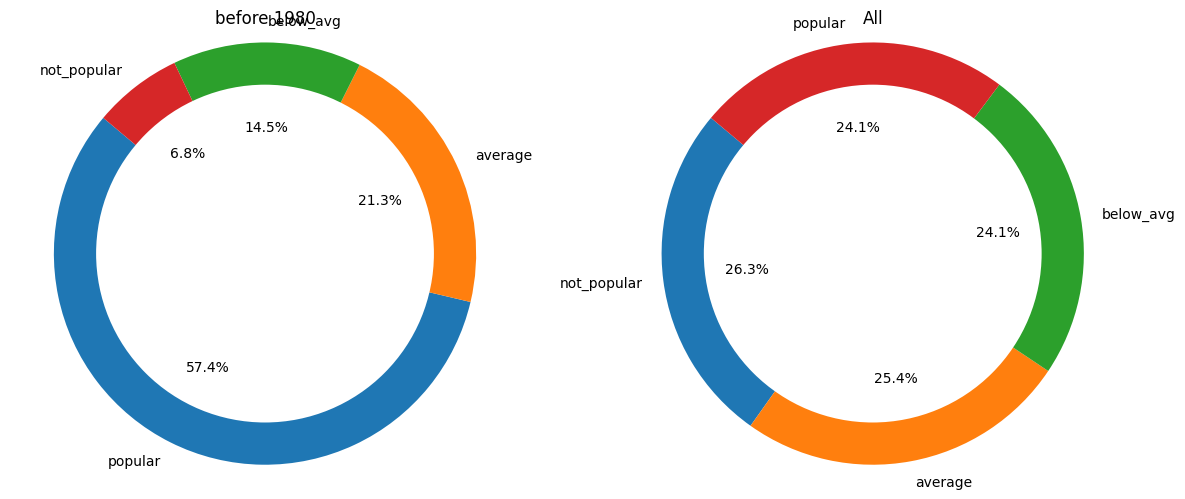

In [99]:
plt.figure(figsize=(12, 5))

colors_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.subplot(1,2,1)
plot_donut_chart(df=df_befor_80, feature='vote_average_categorized', title='before 1980')

plt.subplot(1,2,2)
plot_donut_chart(df=df_eda, feature='vote_average_categorized', title='All')

# Show the plot
plt.tight_layout()
plt.show()

## top best actors

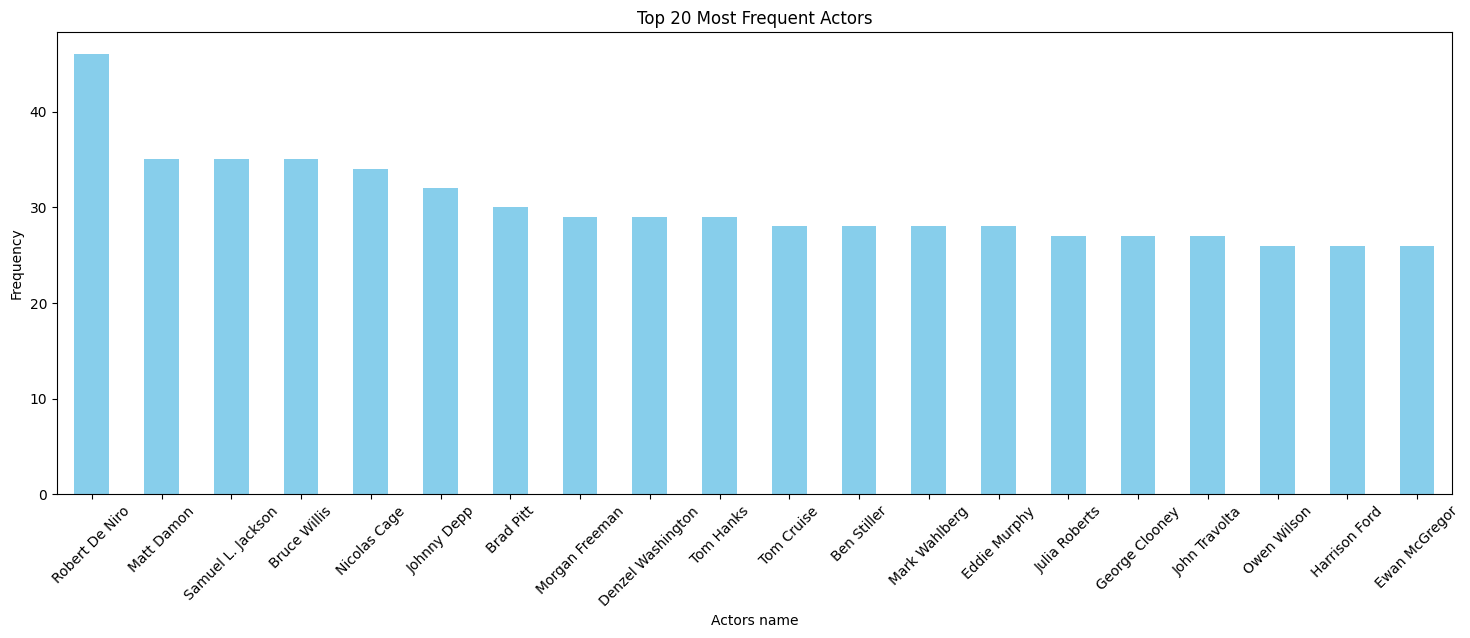

In [124]:
# Concatenate all three columns into a single Series
all_actors = pd.concat([df_eda['actor_1_name'], df_eda['actor_2_name'], df_eda['actor_3_name']])

# Count the occurrences of each actor
actor_counts = all_actors.value_counts()

# Plot the top N most frequent actors
N = 20  # Change N to plot more or fewer actors
top_names = actor_counts.head(N)

plt.figure(figsize=(18, 6))
top_names.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Actors')
plt.xlabel('Actors name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [126]:
df_profit = df_eda[df_eda['profit_categorized'] == 'profit']
df_no_profit = df_eda[df_eda['profit_categorized'] != 'profit']

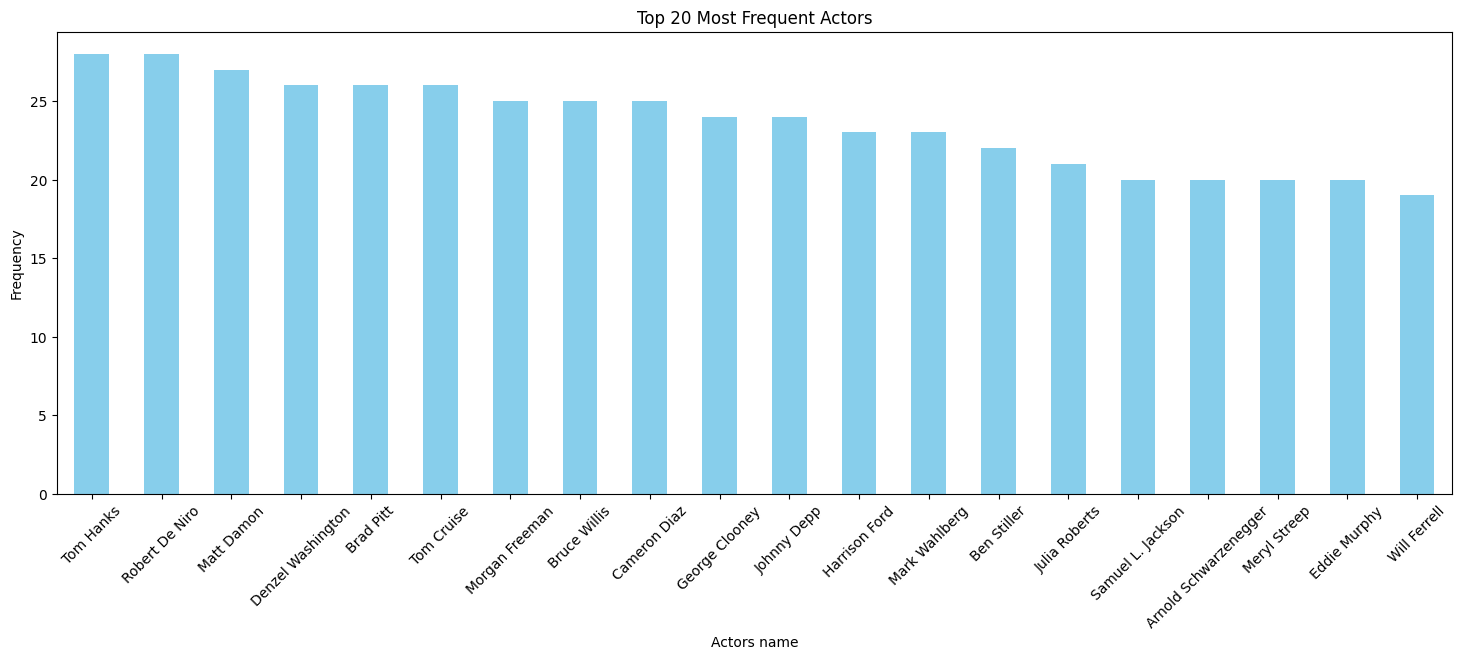

In [131]:
# Concatenate all three columns into a single Series
all_actors = pd.concat([df_profit['actor_1_name'], df_profit['actor_2_name'], df_profit['actor_3_name']])

# Count the occurrences of each actor
actor_counts = all_actors.value_counts()

# Plot the top N most frequent actors
N = 20 # Change N to plot more or fewer actors
top_names = actor_counts.head(N)

plt.figure(figsize=(18, 6))
top_names.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Actors')
plt.xlabel('Actors name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

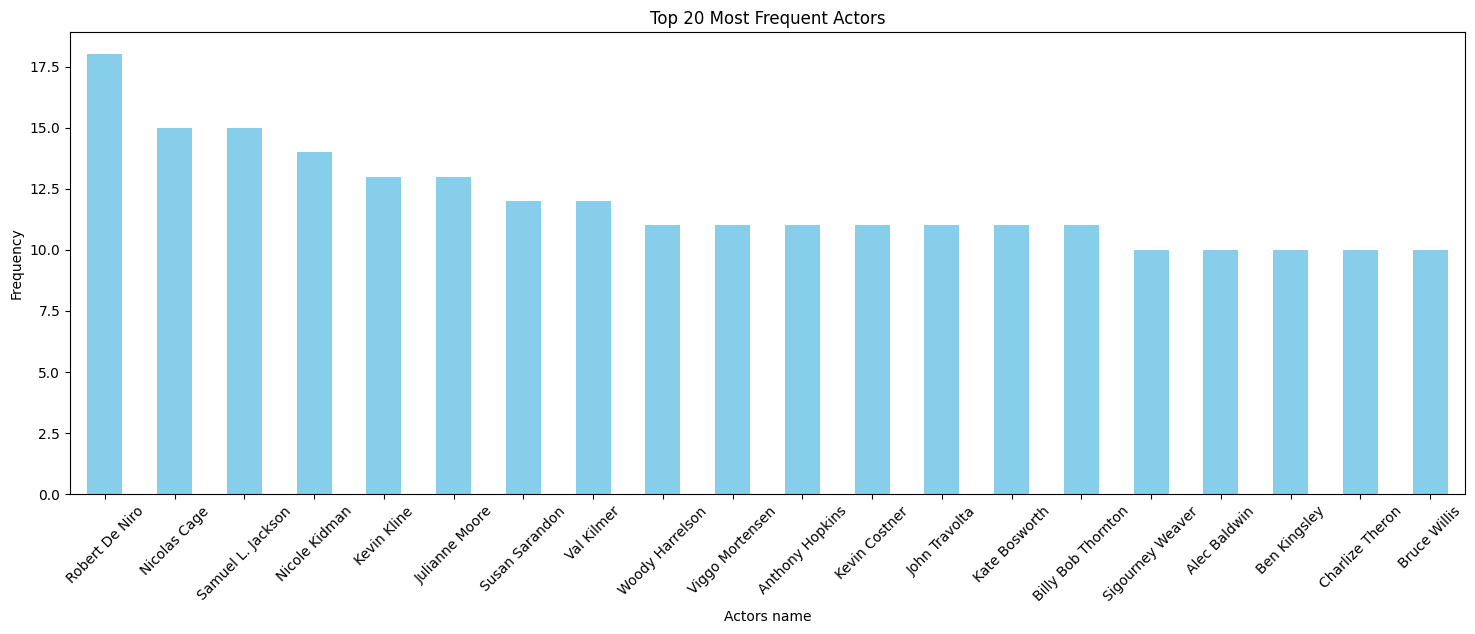

In [132]:
# Concatenate all three columns into a single Series
all_actors = pd.concat([df_no_profit['actor_1_name'], df_no_profit['actor_2_name'], df_no_profit['actor_3_name']])

# Count the occurrences of each actor
actor_counts = all_actors.value_counts()

# Plot the top N most frequent actors
N = 20  # Change N to plot more or fewer actors
top_names = actor_counts.head(N)

plt.figure(figsize=(18, 6))
top_names.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Actors')
plt.xlabel('Actors name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## top companies

In [115]:
import ast

In [117]:
df_eda['production_companies_list'][0]

['Ingenious Film Partners',
 'Twentieth Century Fox Film Corporation',
 'Dune Entertainment',
 'Lightstorm Entertainment']

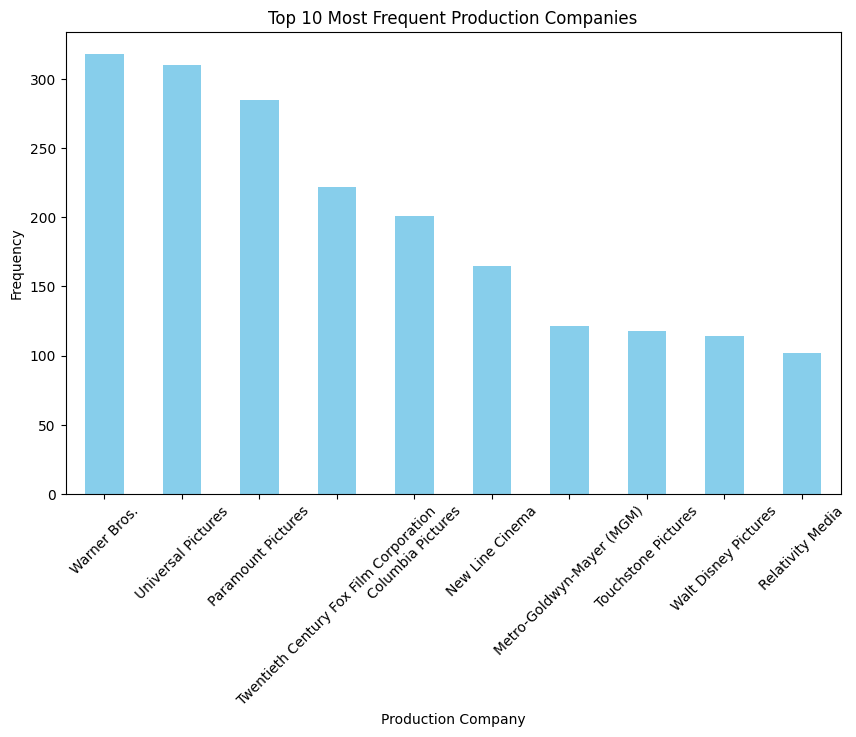

In [118]:
# Flatten the list of production companies
flat_list = [item for sublist in df_eda['production_companies_list'] for item in sublist]

# Count occurrences of each name
name_counts = pd.Series(flat_list).value_counts()

# Plot the top N most frequent names
N = 10  # Change N to plot more or fewer names
top_names = name_counts.head(N)

plt.figure(figsize=(10, 6))
top_names.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [134]:
name_counts.head(10)

Warner Bros.                              318
Universal Pictures                        310
Paramount Pictures                        285
Twentieth Century Fox Film Corporation    222
Columbia Pictures                         201
New Line Cinema                           165
Metro-Goldwyn-Mayer (MGM)                 121
Touchstone Pictures                       118
Walt Disney Pictures                      114
Relativity Media                          102
Name: count, dtype: int64

In [55]:
df_befor_80.head()

,budget,genres,plot_keywords,language,original_title,overview,popularity,production_companies,production_countries,release_date,gross,duration,tagline,vote_average,num_voted_users,country,director_name,actor_1_name,actor_2_name,actor_3_name,budget_categorized,profit,profit_categorized,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,other,first_genre,year,years_since_release,decade,month,season,production_companies_list,language_summarized,vote_average_categorized,plot_keywords_list
409,0.0,Drama|Music,show business|film making|tap dancing|movie in...,English,All That Jazz,Bob Fosse's semi-autobiographical film celebra...,5.159407,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1979-12-20,37.823676,123.0,All that work. All that glitter. All that pain...,7.3,85,United States of America,Bob Fosse,Roy Scheider,Jessica Lange,Leland Palmer,low,37.823676,profit,False,False,False,False,False,True,False,False,False,False,False,False,False,True,Drama,1979,45,befor 1980,12,winter,"['Twentieth Century Fox Film Corporation', 'Co...",English,popular,"['show', 'business', 'film', 'making', 'tap', ..."
812,55.0,Action|Adventure|Fantasy|Science Fiction,saving the world|journalist|dc comics|crime fi...,English,Superman,Mild-mannered Clark Kent works as a reporter a...,48.507081,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1978-12-13,300.218018,143.0,You'll Believe a Man Can Fly!,6.9,1022,United Kingdom,Richard Donner,Christopher Reeve,Marlon Brando,Margot Kidder,high,245.218018,profit,True,True,False,False,False,False,False,True,False,False,False,True,False,False,Action,1978,46,befor 1980,12,winter,"['Warner Bros.', 'Dovemead Films', 'Film Expor...",English,popular,"['saving', 'the', 'world', 'journalist', 'dc',..."
861,2.0,Drama|Romance,sexual obsession|hotel|depression|loss of moth...,English,Lolita,Humbert Humbert is a middle-aged British novel...,23.962109,"[{'name': 'Seven Arts Productions', 'id': 516}...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1962-06-13,9.250000,153.0,How did they ever make a movie of ...,7.3,395,United Kingdom,Stanley Kubrick,James Mason,Sue Lyon,Shelley Winters,average,7.250000,profit,False,False,False,False,False,True,False,False,False,False,True,False,False,False,Drama,1962,62,befor 1980,6,summer,"['Seven Arts Productions', 'Allied Artists', '...",English,popular,"['sexual', 'obsession', 'hotel', 'depression',..."
1027,0.0,Drama|Science Fiction|Adventure|Mystery,1970s|loss of sense of reality|extraterrestria...,Pусский,Солярис,Ground control has been receiving strange tran...,24.132271,"[{'name': 'Mosfilm', 'id': 5120}, {'name': 'Cr...","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1972-03-20,0.000000,167.0,NaN,7.7,357,Russia,Andrei Tarkovsky,Donatas Banionis,Natalya Bondarchuk,Jüri Järvet,low,0.000000,no profit,False,True,False,False,False,True,False,False,False,True,False,True,False,False,Drama,1972,52,befor 1980,3,spring,"['Mosfilm', 'Creative Unit of Writers & Cinema...",Not English,popular,"['1970s', 'loss', 'of', 'sense', 'of', 'realit..."
1065,0.0,Comedy|Drama|Family,nurse|widow|children|parent|sibling,English,"Yours, Mine and Ours",When a widower with 10 children marries a wido...,2.094151,"[{'name': 'Desilu Productions', 'id': 39856}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1968-04-24,0.000000,111.0,Their wedding night set new attendence records,6.2,26,United States of America,Melville Shavelson,Lucille Ball,Henry Fonda,Van Johnson,low,0.000000,no profit,False,False,False,True,False,True,True,False,False,False,False,False,False,False,Comedy,1968,56,befor 1980,4,spring,"['Desilu Productions', 'Walden Productions']",English,below_avg,"['nurse', 'widow', 'children', 'parent', 'sibl..."


# EDA for Machine Learning

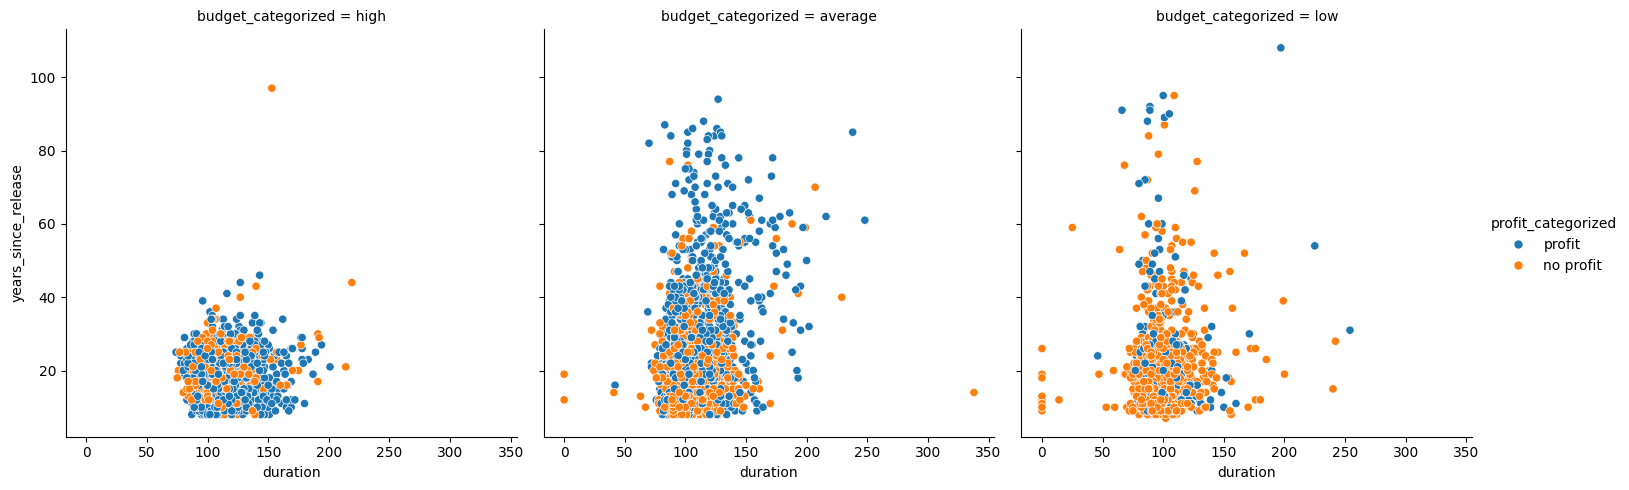

In [31]:
sns.relplot(data=df_eda, x='duration', y='years_since_release', 
            col='budget_categorized' ,hue='profit_categorized')

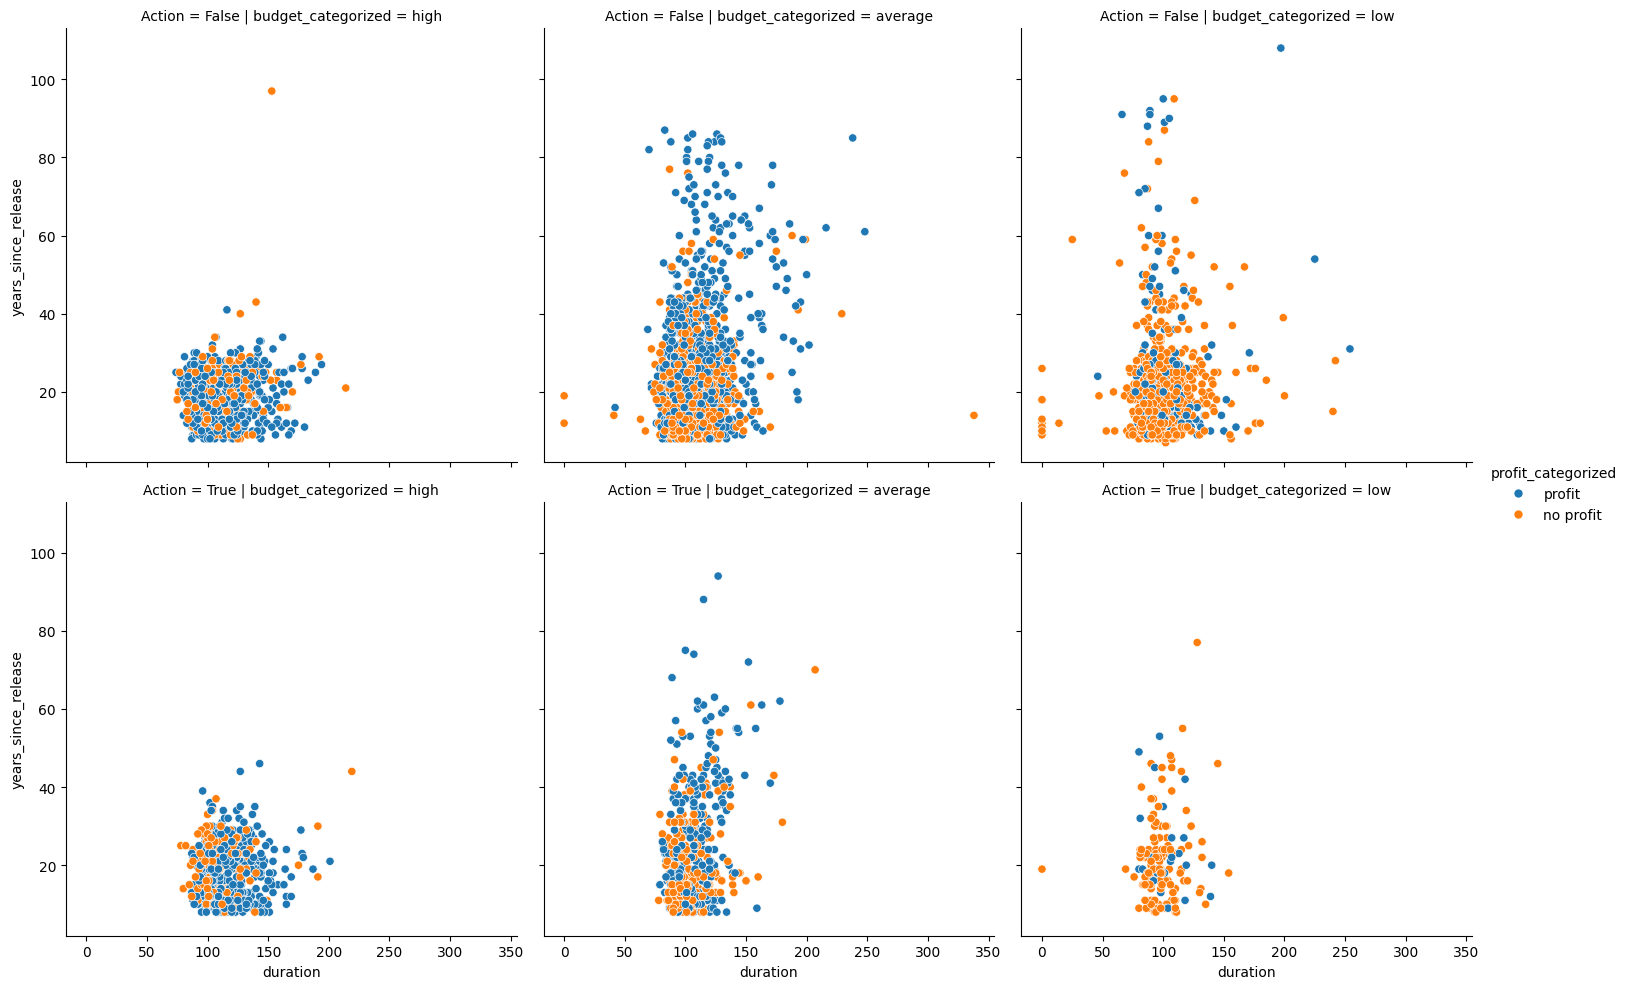

In [32]:
sns.relplot(data=df_eda, x='duration', y='years_since_release', 
            col='budget_categorized' ,row='Action' ,hue='profit_categorized')

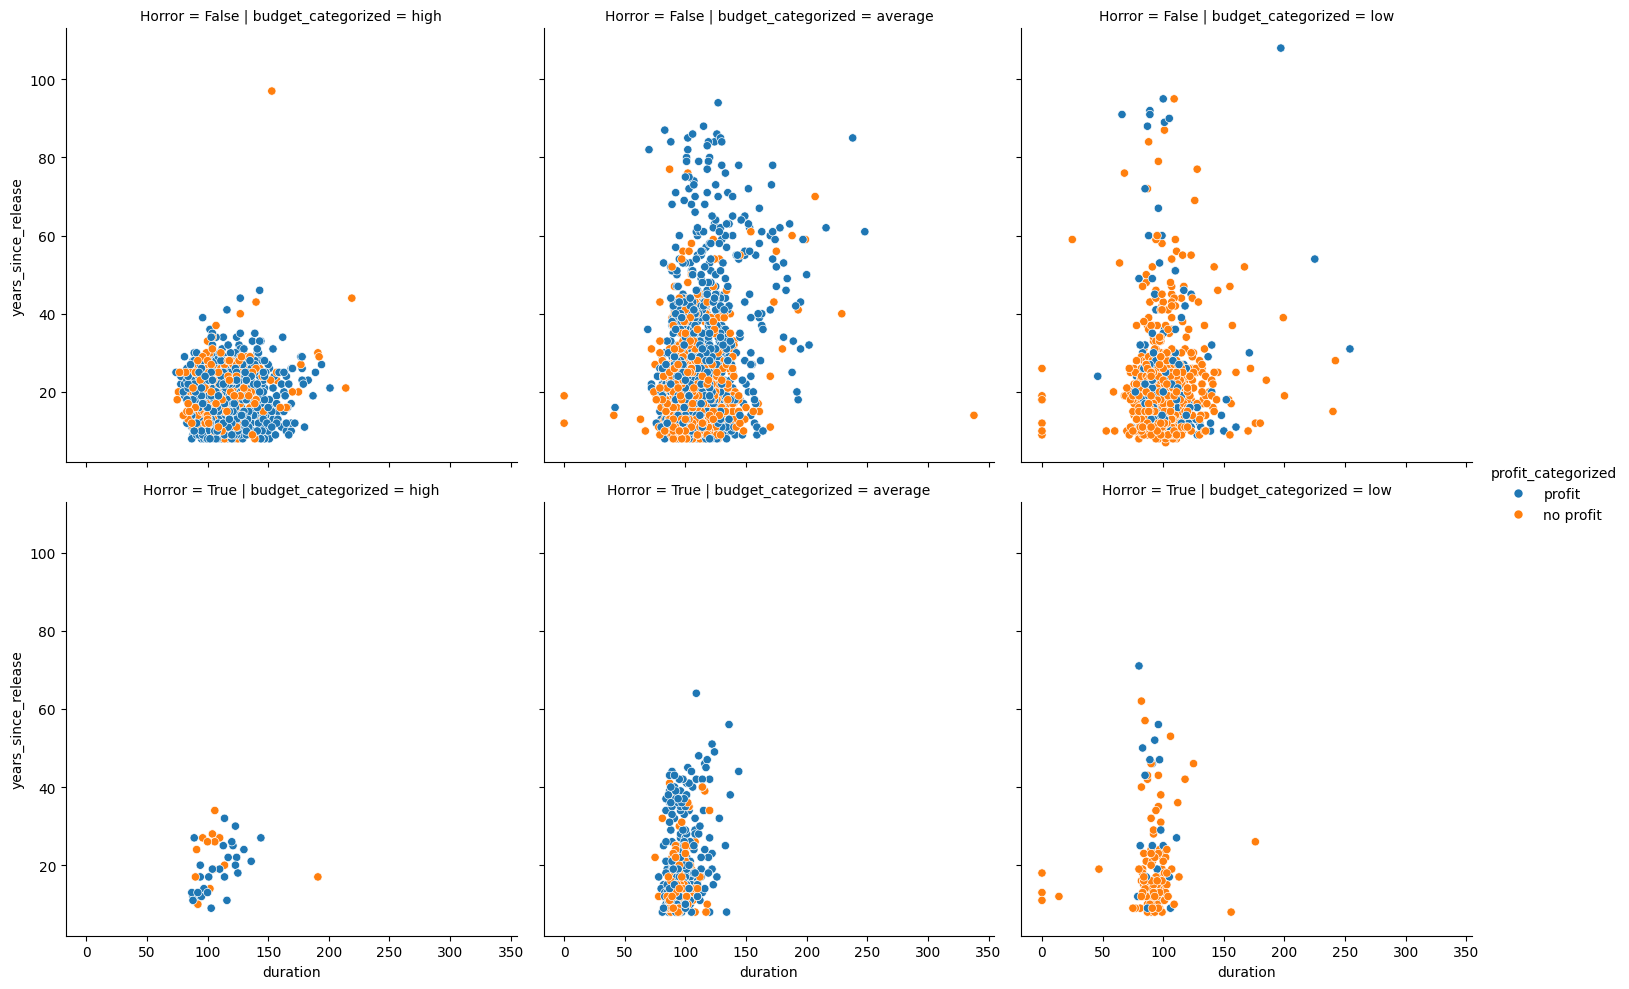

In [34]:
sns.relplot(data=df_eda, x='duration', y='years_since_release', 
            col='budget_categorized' ,row='Horror' ,hue='profit_categorized')

In [ ]:
      ['Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller']